# Moving Average
This strategy does not look at the current price but instead at the moving average of the price pa. We will consider different time intervals for calculating the moving average: two hours, six hours, one day, seven days, 30 days, 100 days, and 200 days. The liquidity position of this strategy will be [pa − a, pa + a]. As in the constant interval strategy 4.3, the leftover token will not be used to provide any liquidity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import date, timedelta

from demeter import (
    TokenInfo,
    Actuator,
    Strategy,
    RowData,
    simple_moving_average,
    ChainType,
    MarketInfo,
    PeriodTrigger,
    BaseAction
)
from demeter.result import performance_metrics, round_results
from demeter.uniswap import UniV3Pool, UniLpMarket


In [2]:
pd.options.display.max_columns = None
pd.set_option("display.width", 5000)

2024-11-28 13:20:04,653 - INFO - Quote token is USDC
2024-11-28 13:20:04,660 - INFO - init strategy...
2024-11-28 13:20:04,835 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:05<00:00, 2104.94it/s]
2024-11-28 13:22:10,054 - INFO - main loop finished
2024-11-28 13:22:17,201 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1848.9482                ETH       :0.70833574               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  401.86797  0.12112704  10400319314274905

Quote by: USDC
Account balance history                           


2024-11-28 13:22:18,493 - INFO - Backtesting finished, execute time 133.8504137992859s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:22:19,286 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:22:24,441 - INFO - load file complete, preparing...
2024-11-28 13:22:31,401 - INFO - data has been prepared
2024-11-28 13:22:32,008 - INFO - Quote token is USDC
2024-11-28 13:22:32,009 - INFO - init strategy...
2024-11-28 13:22:32,185 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:12<00:00, 1993.63it/s]
2024-11-28 13:24:44,377 - INFO - main loop finished
2024-11-28 13:24:53,232 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1865.4632                ETH       :0.71537767               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  398.71462  0.12017661  10318657345196993

Quote by: USDC
Account balance history                           


2024-11-28 13:24:54,861 - INFO - Backtesting finished, execute time 142.86334419250488s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:24:56,057 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:25:02,327 - INFO - load file complete, preparing...
2024-11-28 13:25:09,925 - INFO - data has been prepared
2024-11-28 13:25:10,856 - INFO - Quote token is USDC
2024-11-28 13:25:10,857 - INFO - init strategy...
2024-11-28 13:25:11,306 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:26<00:00, 1794.32it/s]
2024-11-28 13:27:38,305 - INFO - main loop finished
2024-11-28 13:27:46,505 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1828.1836                ETH       :0.68733729               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  410.25051  0.12365354  10617404746453927

Quote by: USDC
Account balance history                           


2024-11-28 13:27:47,892 - INFO - Backtesting finished, execute time 157.05965566635132s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:27:48,665 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:27:54,924 - INFO - load file complete, preparing...
2024-11-28 13:28:02,074 - INFO - data has been prepared
2024-11-28 13:28:02,624 - INFO - Quote token is USDC
2024-11-28 13:28:02,625 - INFO - init strategy...
2024-11-28 13:28:02,798 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:18<00:00, 1899.70it/s]
2024-11-28 13:30:21,530 - INFO - main loop finished
2024-11-28 13:30:29,256 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1812.0793                ETH       :0.68128260               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  410.25051  0.12365354  10617404746453927

Quote by: USDC
Account balance history                           


2024-11-28 13:30:30,710 - INFO - Backtesting finished, execute time 148.09995889663696s


l1                  net_value    tokens             market1                                                                                          price     
l2                                 USDC       ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749 1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749 1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749 1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749 1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  4321.749 

2024-11-28 13:30:31,604 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:30:37,193 - INFO - load file complete, preparing...
2024-11-28 13:30:45,314 - INFO - data has been prepared
2024-11-28 13:30:45,981 - INFO - Quote token is USDC
2024-11-28 13:30:45,983 - INFO - init strategy...
2024-11-28 13:30:46,249 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:15<00:00, 1948.61it/s]
2024-11-28 13:33:01,517 - INFO - main loop finished
2024-11-28 13:33:10,493 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1743.5995                ETH       :0.65553641               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  410.25051  0.12365354  10617404746453927

Quote by: USDC
Account balance history                           


2024-11-28 13:33:11,979 - INFO - Backtesting finished, execute time 146.02024459838867s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

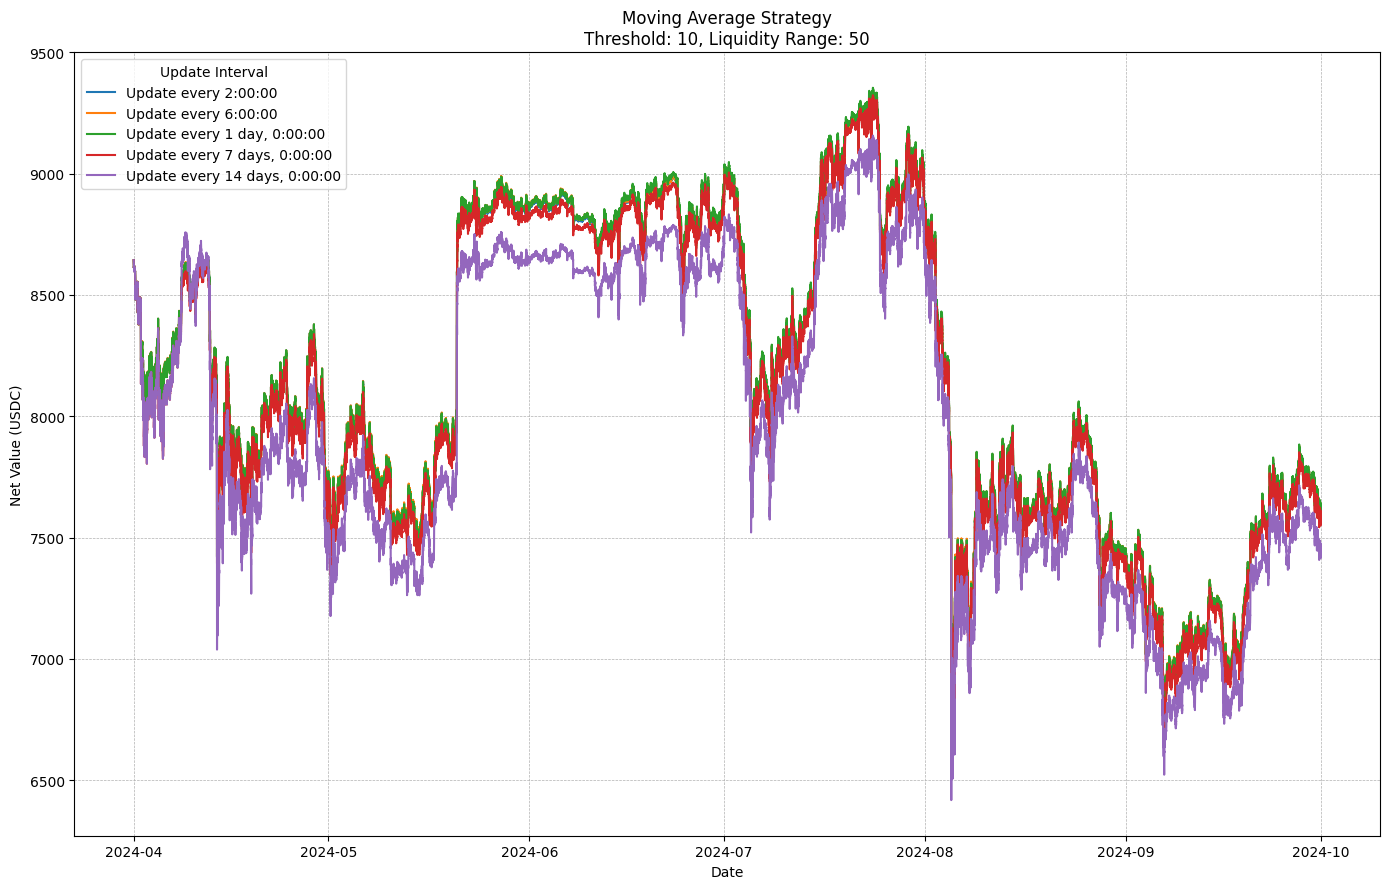

2024-11-28 13:33:13,628 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:33:19,304 - INFO - load file complete, preparing...
2024-11-28 13:33:26,735 - INFO - data has been prepared
2024-11-28 13:33:27,375 - INFO - Quote token is USDC
2024-11-28 13:33:27,377 - INFO - init strategy...
2024-11-28 13:33:27,617 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:02<00:00, 2155.18it/s]
2024-11-28 13:35:29,918 - INFO - main loop finished
2024-11-28 13:35:37,232 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1863.0696                ETH       :0.71374567               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  359.49364  0.10849299  5002175265545905

Quote by: USDC
Account balance history                           


2024-11-28 13:35:38,698 - INFO - Backtesting finished, execute time 131.33780193328857s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:35:41,284 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:35:47,829 - INFO - load file complete, preparing...
2024-11-28 13:35:57,209 - INFO - data has been prepared
2024-11-28 13:35:57,872 - INFO - Quote token is USDC
2024-11-28 13:35:57,873 - INFO - init strategy...
2024-11-28 13:35:58,094 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:21<00:00, 1859.36it/s]
2024-11-28 13:38:19,854 - INFO - main loop finished
2024-11-28 13:38:25,846 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1879.4841                ETH       :0.72075449               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  356.67185  0.10764140  4962898828975670

Quote by: USDC
Account balance history                           


2024-11-28 13:38:27,161 - INFO - Backtesting finished, execute time 149.31023955345154s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:38:27,875 - INFO - start load files from 2024-04-01 to 2024-09-30...



Performance for Threshold = 10, Liquidity Range = 100, Update Interval = 6:00:00:
{Start period: Timestamp('2024-04-01 00:00:00'), End period: Timestamp('2024-09-30 23:59:00'), Duration: Timedelta('183 days 00:00:00'), Return: -1064.827, Rate of Return: -0.123, APR: -0.231, Max Draw Down: 0.295, Sharpe Ratio: -0.649, Volatility: 0.402, Alpha: 0.086, Beta: 0.648, Benchmark return rate: -0.286, Benchmark APR: -0.489}


2024-11-28 13:38:33,420 - INFO - load file complete, preparing...
2024-11-28 13:38:40,688 - INFO - data has been prepared
2024-11-28 13:38:41,232 - INFO - Quote token is USDC
2024-11-28 13:38:41,232 - INFO - init strategy...
2024-11-28 13:38:41,417 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:23<00:00, 1839.26it/s]
2024-11-28 13:41:04,702 - INFO - main loop finished
2024-11-28 13:41:14,152 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1842.7516                ETH       :0.69281435               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  366.99484  0.11075679  5106585461669961

Quote by: USDC
Account balance history                           


2024-11-28 13:41:15,637 - INFO - Backtesting finished, execute time 154.41421961784363s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:41:16,437 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:41:22,270 - INFO - load file complete, preparing...
2024-11-28 13:41:29,735 - INFO - data has been prepared
2024-11-28 13:41:30,403 - INFO - Quote token is USDC
2024-11-28 13:41:30,404 - INFO - init strategy...
2024-11-28 13:41:30,588 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:13<00:00, 1973.54it/s]
2024-11-28 13:43:44,133 - INFO - main loop finished
2024-11-28 13:43:52,279 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1826.5189                ETH       :0.68671142               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  366.99484  0.11075679  5106585461669961

Quote by: USDC
Account balance history                           


2024-11-28 13:43:53,680 - INFO - Backtesting finished, execute time 143.29854249954224s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:43:54,420 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:44:00,272 - INFO - load file complete, preparing...
2024-11-28 13:44:07,877 - INFO - data has been prepared
2024-11-28 13:44:08,494 - INFO - Quote token is USDC
2024-11-28 13:44:08,496 - INFO - init strategy...
2024-11-28 13:44:08,682 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:26<00:00, 1794.64it/s]
2024-11-28 13:46:35,543 - INFO - main loop finished
2024-11-28 13:46:50,678 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1757.4934                ETH       :0.66076007               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  366.99484  0.11075679  5106585461669961

Quote by: USDC
Account balance history                           


2024-11-28 13:46:52,347 - INFO - Backtesting finished, execute time 163.86352396011353s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

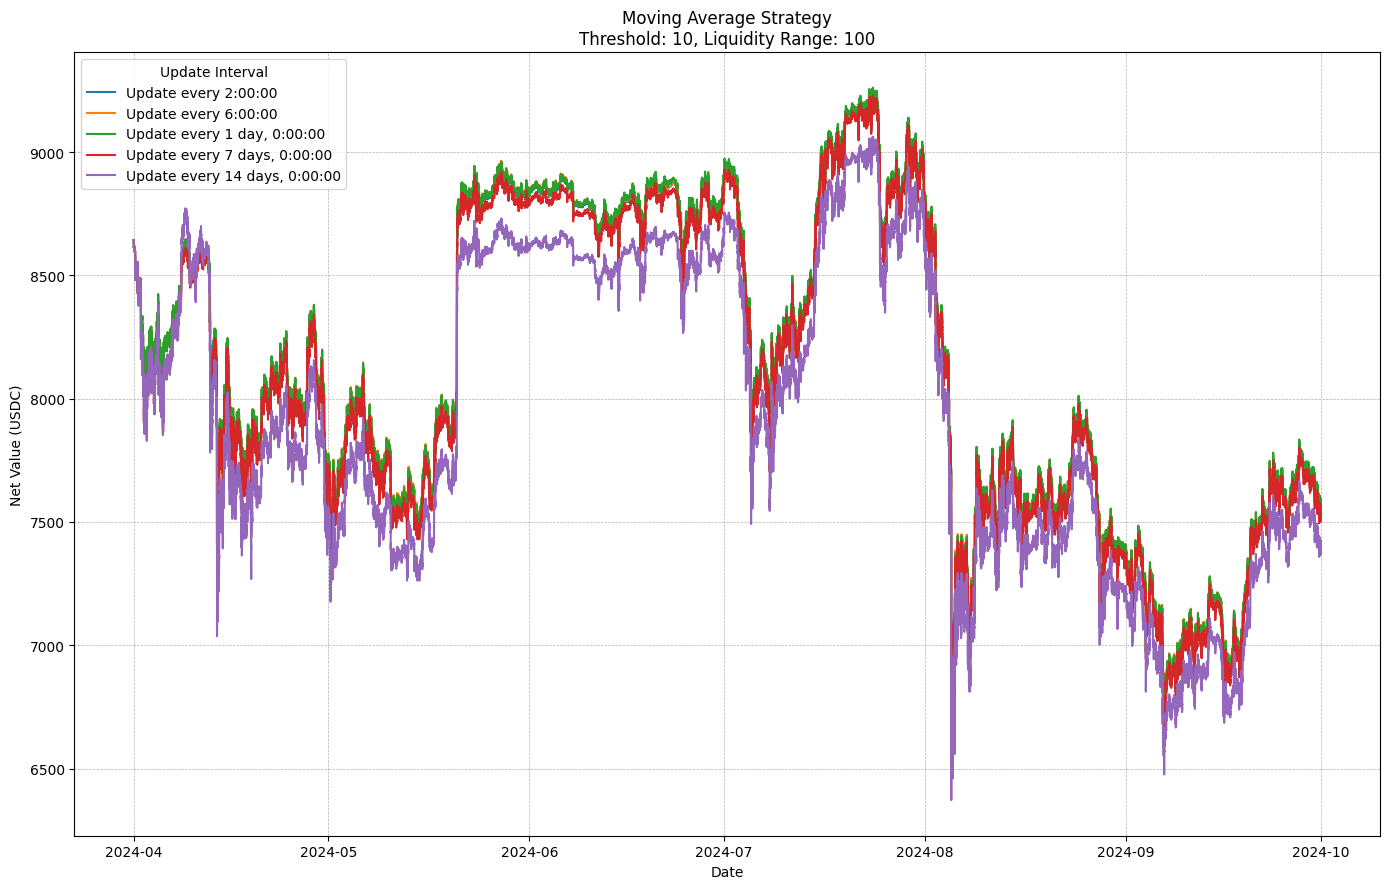

2024-11-28 13:46:53,806 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:47:00,598 - INFO - load file complete, preparing...
2024-11-28 13:47:08,013 - INFO - data has been prepared
2024-11-28 13:47:08,719 - INFO - Quote token is USDC
2024-11-28 13:47:08,720 - INFO - init strategy...
2024-11-28 13:47:09,044 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:20<00:00, 1871.34it/s]
2024-11-28 13:49:29,902 - INFO - main loop finished
2024-11-28 13:49:40,151 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1869.6978                ETH       :0.71628496               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  343.41918  0.10457927  2468420953631414

Quote by: USDC
Account balance history                           


2024-11-28 13:49:41,742 - INFO - Backtesting finished, execute time 153.04313015937805s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:49:44,159 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:49:50,819 - INFO - load file complete, preparing...
2024-11-28 13:49:57,878 - INFO - data has been prepared
2024-11-28 13:49:58,551 - INFO - Quote token is USDC
2024-11-28 13:49:58,552 - INFO - init strategy...
2024-11-28 13:49:58,730 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:12<00:00, 1987.55it/s]
2024-11-28 13:52:11,336 - INFO - main loop finished
2024-11-28 13:52:19,458 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1886.0652                ETH       :0.72327824               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  340.72323  0.10375829  2449039229907793

Quote by: USDC
Account balance history                           


2024-11-28 13:52:20,994 - INFO - Backtesting finished, execute time 142.45485305786133s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:52:21,837 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:52:27,190 - INFO - load file complete, preparing...
2024-11-28 13:52:34,381 - INFO - data has been prepared
2024-11-28 13:52:35,393 - INFO - Quote token is USDC
2024-11-28 13:52:35,394 - INFO - init strategy...
2024-11-28 13:52:35,580 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:09<00:00, 2030.93it/s]
2024-11-28 13:54:45,350 - INFO - main loop finished
2024-11-28 13:54:53,145 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1849.5894                ETH       :0.69538515               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  350.58590  0.10676170  2519944201459329

Quote by: USDC
Account balance history                           


2024-11-28 13:54:54,577 - INFO - Backtesting finished, execute time 139.1953272819519s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:54:55,342 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:55:00,614 - INFO - load file complete, preparing...
2024-11-28 13:55:09,140 - INFO - data has been prepared
2024-11-28 13:55:10,639 - INFO - Quote token is USDC
2024-11-28 13:55:10,640 - INFO - init strategy...
2024-11-28 13:55:10,884 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:20<00:00, 1873.59it/s]
2024-11-28 13:57:31,560 - INFO - main loop finished
2024-11-28 13:57:40,243 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1833.2965                ETH       :0.68925957               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  350.58590  0.10676170  2519944201459329

Quote by: USDC
Account balance history                           


2024-11-28 13:57:41,840 - INFO - Backtesting finished, execute time 151.23292708396912s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 13:57:42,615 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 13:57:48,203 - INFO - load file complete, preparing...
2024-11-28 13:57:55,719 - INFO - data has been prepared
2024-11-28 13:57:56,331 - INFO - Quote token is USDC
2024-11-28 13:57:56,332 - INFO - init strategy...
2024-11-28 13:57:56,540 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:14<00:00, 1961.09it/s]
2024-11-28 14:00:10,928 - INFO - main loop finished
2024-11-28 14:00:20,809 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1764.0149                ETH       :0.66321193               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  350.58590  0.10676170  2519944201459329

Quote by: USDC
Account balance history                           


2024-11-28 14:00:22,183 - INFO - Backtesting finished, execute time 145.868182182312s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

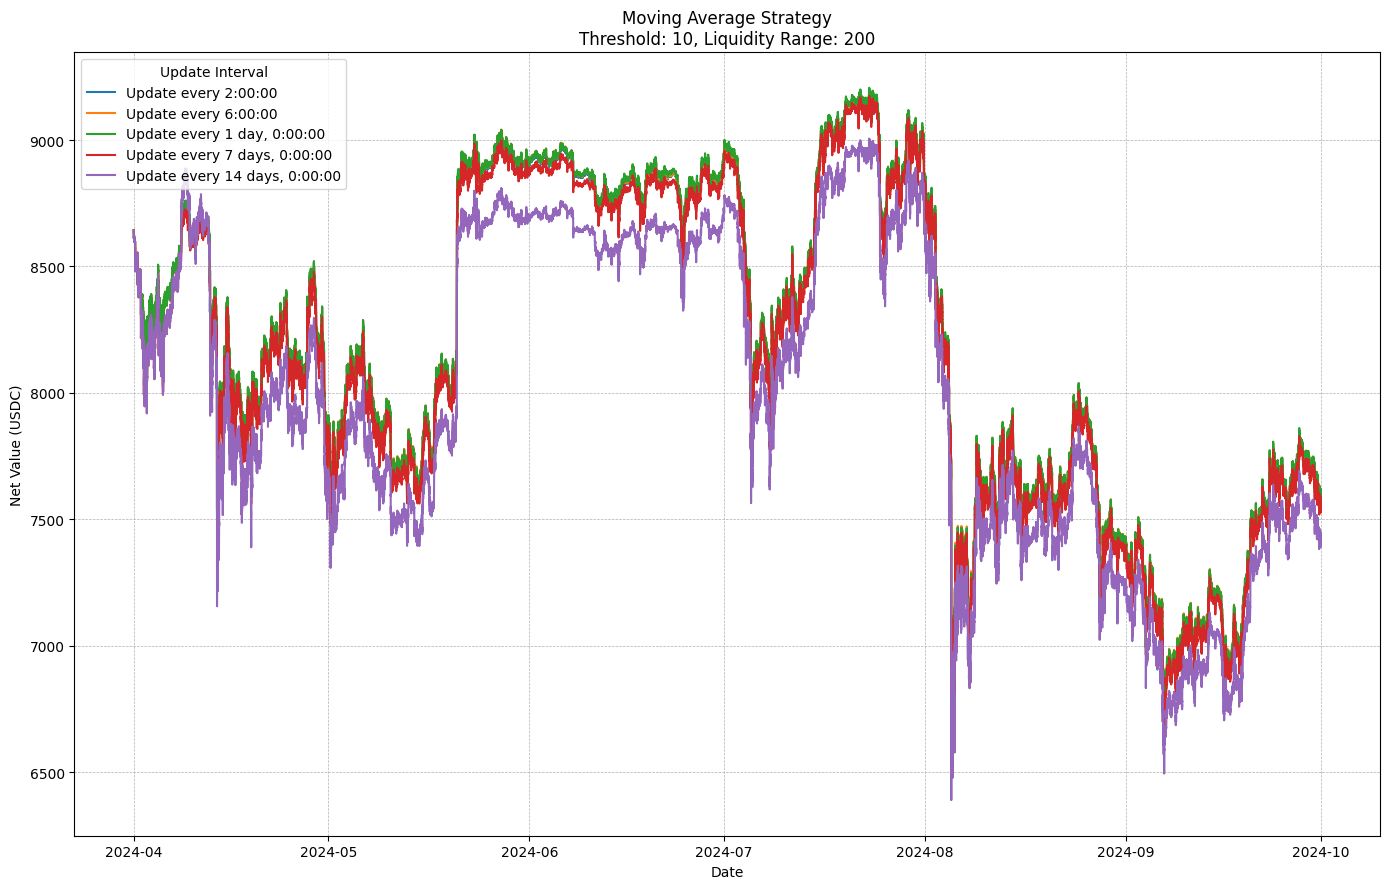

2024-11-28 14:00:23,825 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:00:29,881 - INFO - load file complete, preparing...
2024-11-28 14:00:37,384 - INFO - data has been prepared
2024-11-28 14:00:38,214 - INFO - Quote token is USDC
2024-11-28 14:00:38,214 - INFO - init strategy...
2024-11-28 14:00:38,432 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:27<00:00, 1789.20it/s]
2024-11-28 14:03:05,733 - INFO - main loop finished
2024-11-28 14:03:12,307 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1848.9482                ETH       :0.70833574               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  401.86797  0.12112704  10400319314274905

Quote by: USDC
Account balance history                           


2024-11-28 14:03:13,671 - INFO - Backtesting finished, execute time 155.47633290290833s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:03:15,515 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:03:22,646 - INFO - load file complete, preparing...
2024-11-28 14:03:29,744 - INFO - data has been prepared
2024-11-28 14:03:30,513 - INFO - Quote token is USDC
2024-11-28 14:03:30,515 - INFO - init strategy...
2024-11-28 14:03:30,682 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:02<00:00, 2159.00it/s]
2024-11-28 14:05:32,753 - INFO - main loop finished
2024-11-28 14:05:39,179 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1865.4632                ETH       :0.71537767               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  398.71462  0.12017661  10318657345196993

Quote by: USDC
Account balance history                           


2024-11-28 14:05:40,543 - INFO - Backtesting finished, execute time 130.04217839241028s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:05:41,235 - INFO - start load files from 2024-04-01 to 2024-09-30...



Performance for Threshold = 25, Liquidity Range = 50, Update Interval = 6:00:00:
{Start period: Timestamp('2024-04-01 00:00:00'), End period: Timestamp('2024-09-30 23:59:00'), Duration: Timedelta('183 days 00:00:00'), Return: -1018.274, Rate of Return: -0.118, APR: -0.221, Max Draw Down: 0.298, Sharpe Ratio: -0.622, Volatility: 0.404, Alpha: 0.098, Beta: 0.652, Benchmark return rate: -0.286, Benchmark APR: -0.489}


2024-11-28 14:05:46,680 - INFO - load file complete, preparing...
2024-11-28 14:05:54,429 - INFO - data has been prepared
2024-11-28 14:05:55,474 - INFO - Quote token is USDC
2024-11-28 14:05:55,476 - INFO - init strategy...
2024-11-28 14:05:55,761 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:14<00:00, 1964.69it/s]
2024-11-28 14:08:09,928 - INFO - main loop finished
2024-11-28 14:08:22,686 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1828.1836                ETH       :0.68733729               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  410.25051  0.12365354  10617404746453927

Quote by: USDC
Account balance history                           


2024-11-28 14:08:25,087 - INFO - Backtesting finished, execute time 149.6337776184082s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:08:26,839 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:08:33,068 - INFO - load file complete, preparing...
2024-11-28 14:08:41,482 - INFO - data has been prepared
2024-11-28 14:08:42,385 - INFO - Quote token is USDC
2024-11-28 14:08:42,387 - INFO - init strategy...
2024-11-28 14:08:42,592 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:51<00:00, 1534.33it/s]
2024-11-28 14:11:34,418 - INFO - main loop finished
2024-11-28 14:11:41,731 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1812.0793                ETH       :0.68128260               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  410.25051  0.12365354  10617404746453927

Quote by: USDC
Account balance history                           


2024-11-28 14:11:43,256 - INFO - Backtesting finished, execute time 180.88673663139343s


l1                  net_value    tokens             market1                                                                                          price     
l2                                 USDC       ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749 1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749 1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749 1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749 1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  4321.749 

2024-11-28 14:11:44,099 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:11:50,396 - INFO - load file complete, preparing...
2024-11-28 14:11:59,208 - INFO - data has been prepared
2024-11-28 14:11:59,933 - INFO - Quote token is USDC
2024-11-28 14:11:59,936 - INFO - init strategy...
2024-11-28 14:12:00,191 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [03:08<00:00, 1395.56it/s]
2024-11-28 14:15:09,051 - INFO - main loop finished
2024-11-28 14:15:18,527 - INFO - Print actuator summary
2024-11-28 14:15:20,311 - INFO - Backtesting finished, execute time 200.4410002231598s


Final account status                              
Token balance in broker       
USDC      :1743.5995                ETH       :0.65553641               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  410.25051  0.12365354  10617404746453927

Quote by: USDC
Account balance history                           
l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                

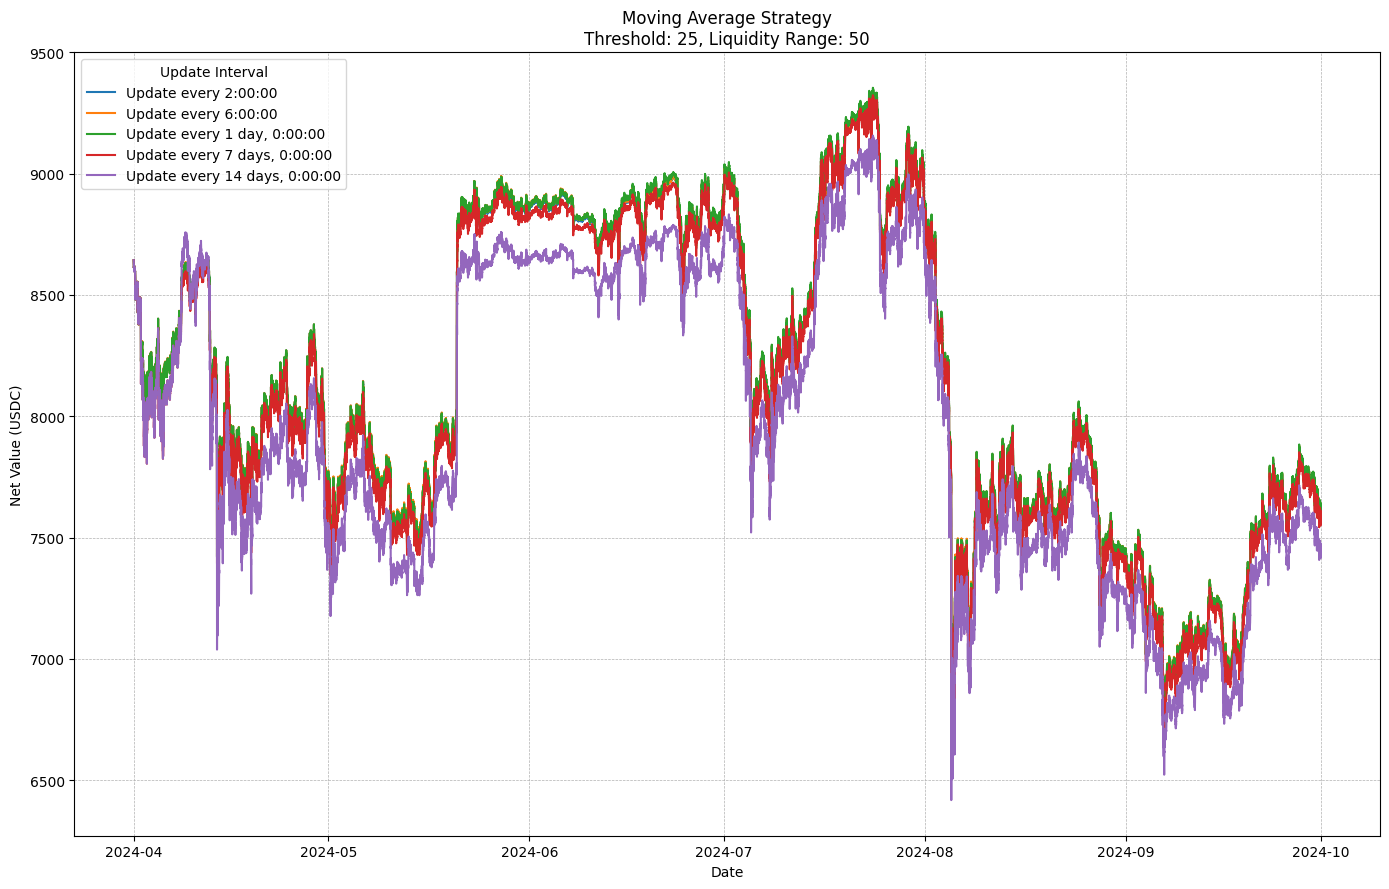

2024-11-28 14:15:23,187 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:15:31,545 - INFO - load file complete, preparing...
2024-11-28 14:15:40,606 - INFO - data has been prepared
2024-11-28 14:15:41,449 - INFO - Quote token is USDC
2024-11-28 14:15:41,450 - INFO - init strategy...
2024-11-28 14:15:41,648 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:13<00:00, 1977.35it/s]
2024-11-28 14:17:54,940 - INFO - main loop finished
2024-11-28 14:18:02,514 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1863.0696                ETH       :0.71374567               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  359.49364  0.10849299  5002175265545905

Quote by: USDC
Account balance history                           


2024-11-28 14:18:03,906 - INFO - Backtesting finished, execute time 142.47612237930298s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:18:05,768 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:18:12,795 - INFO - load file complete, preparing...
2024-11-28 14:18:20,355 - INFO - data has been prepared
2024-11-28 14:18:20,944 - INFO - Quote token is USDC
2024-11-28 14:18:20,945 - INFO - init strategy...
2024-11-28 14:18:21,131 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:20<00:00, 1869.44it/s]
2024-11-28 14:20:42,117 - INFO - main loop finished
2024-11-28 14:20:53,172 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1879.4841                ETH       :0.72075449               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  356.67185  0.10764140  4962898828975670

Quote by: USDC
Account balance history                           


2024-11-28 14:20:55,310 - INFO - Backtesting finished, execute time 154.37697076797485s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:20:56,912 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:21:04,387 - INFO - load file complete, preparing...
2024-11-28 14:21:12,580 - INFO - data has been prepared
2024-11-28 14:21:13,573 - INFO - Quote token is USDC
2024-11-28 14:21:13,574 - INFO - init strategy...
2024-11-28 14:21:13,792 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:18<00:00, 1905.83it/s]
2024-11-28 14:23:32,112 - INFO - main loop finished
2024-11-28 14:23:39,401 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1842.7516                ETH       :0.69281435               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  366.99484  0.11075679  5106585461669961

Quote by: USDC
Account balance history                           


2024-11-28 14:23:40,936 - INFO - Backtesting finished, execute time 147.38696694374084s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:23:41,749 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:23:47,365 - INFO - load file complete, preparing...
2024-11-28 14:23:56,480 - INFO - data has been prepared
2024-11-28 14:23:57,030 - INFO - Quote token is USDC
2024-11-28 14:23:57,031 - INFO - init strategy...
2024-11-28 14:23:57,215 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:06<00:00, 2080.47it/s]
2024-11-28 14:26:03,900 - INFO - main loop finished
2024-11-28 14:26:11,154 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1826.5189                ETH       :0.68671142               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  366.99484  0.11075679  5106585461669961

Quote by: USDC
Account balance history                           


2024-11-28 14:26:12,638 - INFO - Backtesting finished, execute time 135.62111067771912s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:26:13,557 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:26:19,359 - INFO - load file complete, preparing...
2024-11-28 14:26:26,256 - INFO - data has been prepared
2024-11-28 14:26:26,953 - INFO - Quote token is USDC
2024-11-28 14:26:26,966 - INFO - init strategy...
2024-11-28 14:26:27,349 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:24<00:00, 1823.65it/s]
2024-11-28 14:28:51,871 - INFO - main loop finished
2024-11-28 14:29:02,667 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1757.4934                ETH       :0.66076007               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  366.99484  0.11075679  5106585461669961

Quote by: USDC
Account balance history                           


2024-11-28 14:29:04,268 - INFO - Backtesting finished, execute time 157.4174702167511s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

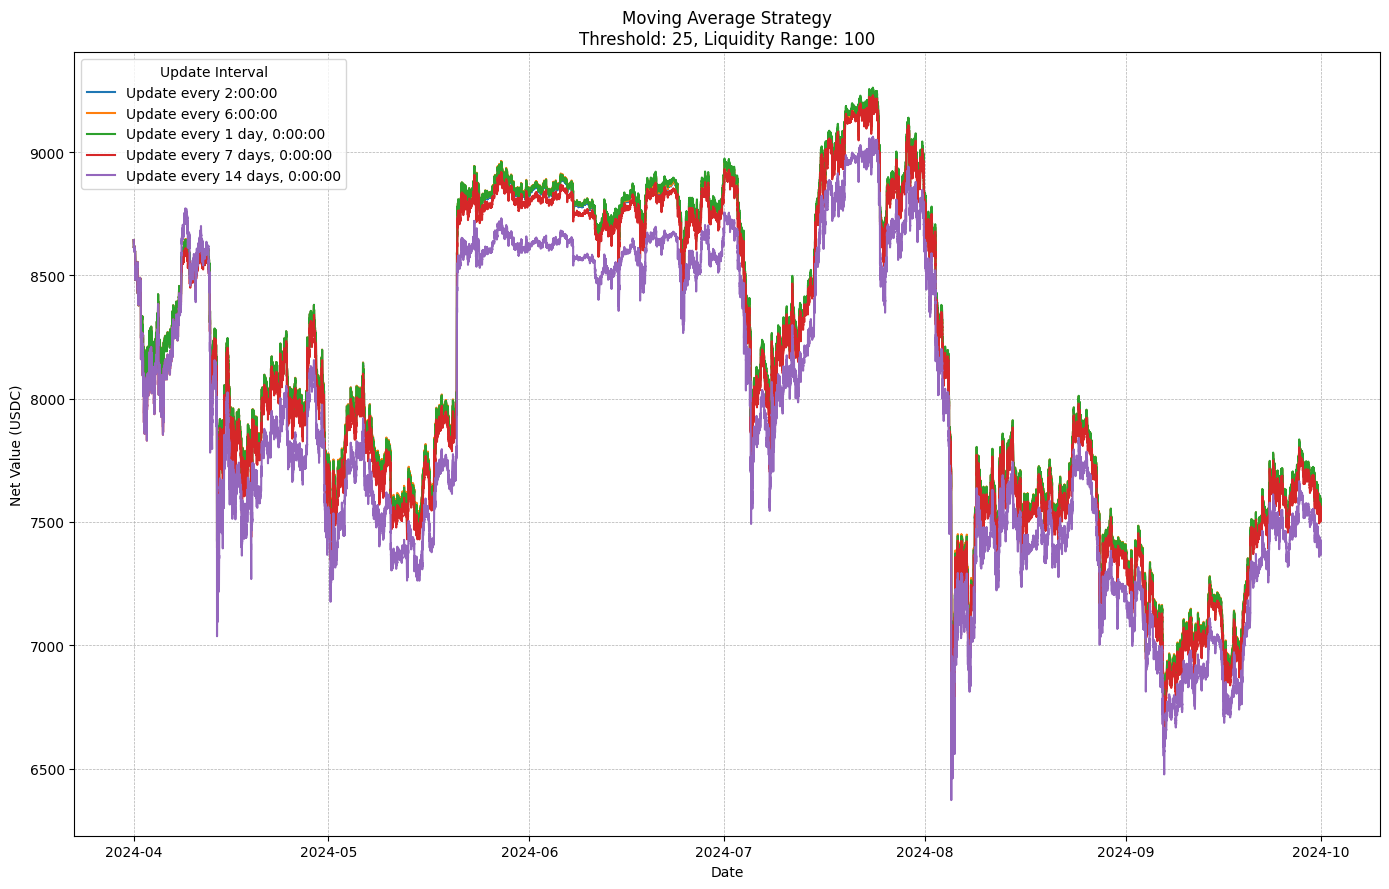

2024-11-28 14:29:06,152 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:29:13,572 - INFO - load file complete, preparing...
2024-11-28 14:29:22,030 - INFO - data has been prepared
2024-11-28 14:29:23,339 - INFO - Quote token is USDC
2024-11-28 14:29:23,341 - INFO - init strategy...
2024-11-28 14:29:23,609 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:38<00:00, 1663.34it/s]
2024-11-28 14:32:02,091 - INFO - main loop finished
2024-11-28 14:32:20,800 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1869.6978                ETH       :0.71628496               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  343.41918  0.10457927  2468420953631414

Quote by: USDC
Account balance history                           


2024-11-28 14:32:22,341 - INFO - Backtesting finished, execute time 179.02208924293518s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:32:24,201 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:32:31,268 - INFO - load file complete, preparing...
2024-11-28 14:32:39,257 - INFO - data has been prepared
2024-11-28 14:32:39,873 - INFO - Quote token is USDC
2024-11-28 14:32:39,875 - INFO - init strategy...
2024-11-28 14:32:40,057 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:01<00:00, 2177.04it/s]
2024-11-28 14:34:41,122 - INFO - main loop finished
2024-11-28 14:34:47,464 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1886.0652                ETH       :0.72327824               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  340.72323  0.10375829  2449039229907793

Quote by: USDC
Account balance history                           


2024-11-28 14:34:48,876 - INFO - Backtesting finished, execute time 129.01665616035461s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:34:49,729 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:34:55,324 - INFO - load file complete, preparing...
2024-11-28 14:35:02,361 - INFO - data has been prepared
2024-11-28 14:35:03,299 - INFO - Quote token is USDC
2024-11-28 14:35:03,300 - INFO - init strategy...
2024-11-28 14:35:03,465 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:53<00:00, 2315.14it/s]
2024-11-28 14:36:57,301 - INFO - main loop finished
2024-11-28 14:37:04,932 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1849.5894                ETH       :0.69538515               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  350.58590  0.10676170  2519944201459329

Quote by: USDC
Account balance history                           


2024-11-28 14:37:06,290 - INFO - Backtesting finished, execute time 123.00161671638489s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:37:07,370 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:37:12,785 - INFO - load file complete, preparing...
2024-11-28 14:37:20,755 - INFO - data has been prepared
2024-11-28 14:37:21,542 - INFO - Quote token is USDC
2024-11-28 14:37:21,542 - INFO - init strategy...
2024-11-28 14:37:21,754 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:24<00:00, 1820.13it/s]
2024-11-28 14:39:46,568 - INFO - main loop finished
2024-11-28 14:39:59,317 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1833.2965                ETH       :0.68925957               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  350.58590  0.10676170  2519944201459329

Quote by: USDC
Account balance history                           


2024-11-28 14:40:00,980 - INFO - Backtesting finished, execute time 159.4547529220581s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:40:01,874 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:40:08,439 - INFO - load file complete, preparing...
2024-11-28 14:40:18,048 - INFO - data has been prepared
2024-11-28 14:40:18,683 - INFO - Quote token is USDC
2024-11-28 14:40:18,685 - INFO - init strategy...
2024-11-28 14:40:18,907 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:31<00:00, 1735.73it/s]
2024-11-28 14:42:50,818 - INFO - main loop finished
2024-11-28 14:43:00,459 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1764.0149                ETH       :0.66321193               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  350.58590  0.10676170  2519944201459329

Quote by: USDC
Account balance history                           


2024-11-28 14:43:02,488 - INFO - Backtesting finished, execute time 163.82035565376282s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

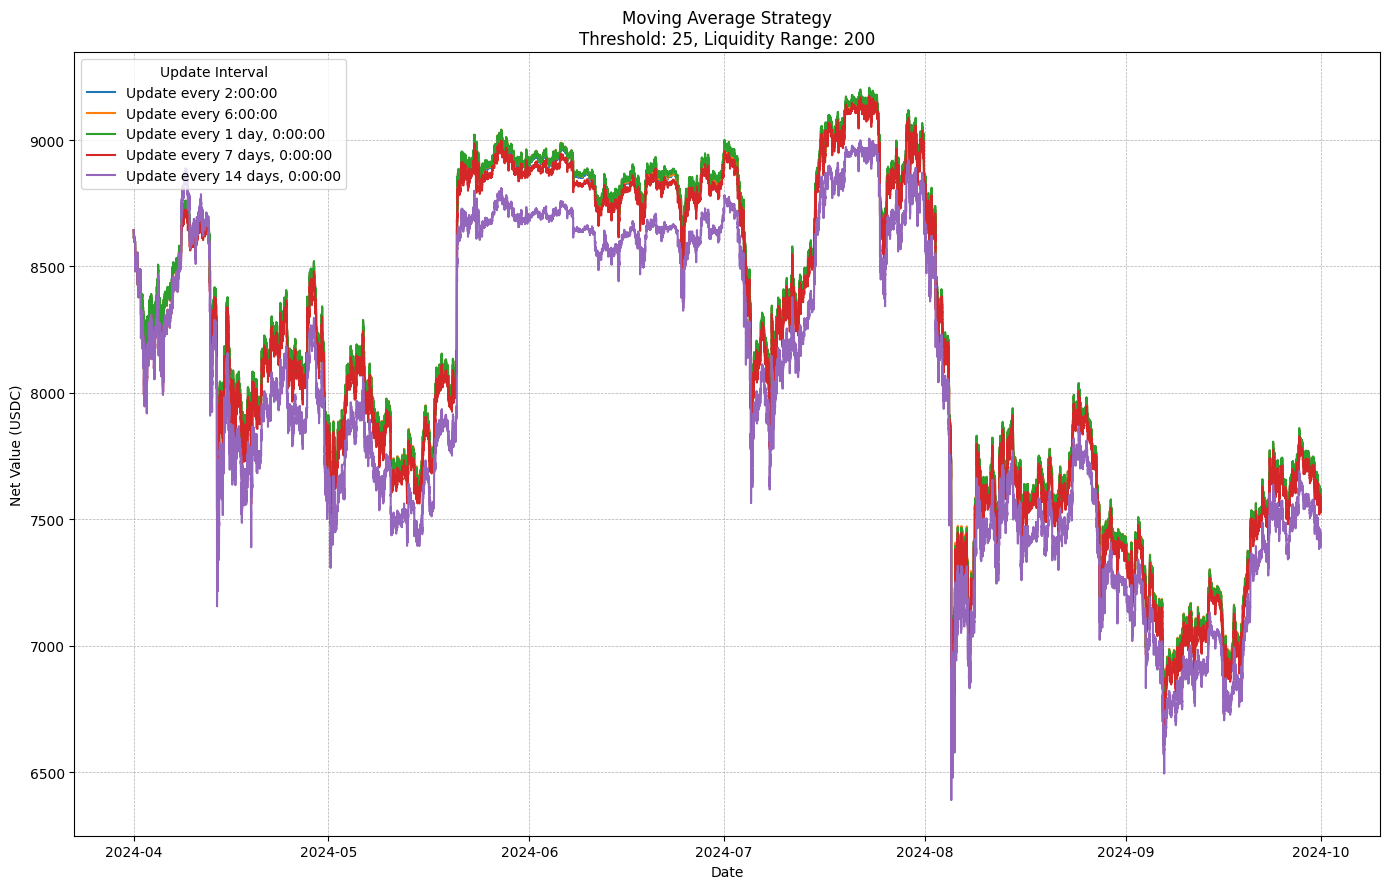

2024-11-28 14:43:04,374 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:43:11,523 - INFO - load file complete, preparing...
2024-11-28 14:43:22,259 - INFO - data has been prepared
2024-11-28 14:43:23,416 - INFO - Quote token is USDC
2024-11-28 14:43:23,419 - INFO - init strategy...
2024-11-28 14:43:23,704 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:29<00:00, 1760.37it/s]
2024-11-28 14:45:53,436 - INFO - main loop finished
2024-11-28 14:46:03,380 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1818.6426                ETH       :0.69672560               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      194920  340.90243  0.10175294  9881691540212683

Quote by: USDC
Account balance history                           


2024-11-28 14:46:04,799 - INFO - Backtesting finished, execute time 161.4112536907196s


l1                  net_value    tokens             market1                                                                                          price     
l2                                 USDC       ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749 1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749 1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749 1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749 1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  4321.749 

2024-11-28 14:46:07,178 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:46:14,231 - INFO - load file complete, preparing...
2024-11-28 14:46:22,710 - INFO - data has been prepared
2024-11-28 14:46:23,698 - INFO - Quote token is USDC
2024-11-28 14:46:23,701 - INFO - init strategy...
2024-11-28 14:46:23,919 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:14<00:00, 1965.45it/s]
2024-11-28 14:48:38,024 - INFO - main loop finished
2024-11-28 14:48:45,003 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1787.7564                ETH       :0.68557825               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      194920  340.92186  0.10175874  9882255129533205

Quote by: USDC
Account balance history                           


2024-11-28 14:48:46,405 - INFO - Backtesting finished, execute time 142.727600812912s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:48:47,155 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:48:52,729 - INFO - load file complete, preparing...
2024-11-28 14:49:01,127 - INFO - data has been prepared
2024-11-28 14:49:02,094 - INFO - Quote token is USDC
2024-11-28 14:49:02,095 - INFO - init strategy...
2024-11-28 14:49:02,290 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:29<00:00, 1764.72it/s]
2024-11-28 14:51:31,643 - INFO - main loop finished
2024-11-28 14:51:40,116 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1781.4906                ETH       :0.66978223               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      194920  340.88327  0.10174723  9881135743298187

Quote by: USDC
Account balance history                           


2024-11-28 14:51:41,825 - INFO - Backtesting finished, execute time 159.7465922832489s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:51:42,917 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:51:49,978 - INFO - load file complete, preparing...
2024-11-28 14:51:57,866 - INFO - data has been prepared
2024-11-28 14:51:58,971 - INFO - Quote token is USDC
2024-11-28 14:51:58,980 - INFO - init strategy...
2024-11-28 14:51:59,250 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:30<00:00, 1756.60it/s]
2024-11-28 14:54:29,301 - INFO - main loop finished
2024-11-28 14:54:39,102 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1786.9202                ETH       :0.67182357               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194770      194920  347.52653  0.10373011  10073832785962625

Quote by: USDC
Account balance history                           


2024-11-28 14:54:40,660 - INFO - Backtesting finished, execute time 161.71019577980042s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 14:54:41,456 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:54:47,785 - INFO - load file complete, preparing...
2024-11-28 14:54:56,007 - INFO - data has been prepared
2024-11-28 14:54:56,559 - INFO - Quote token is USDC
2024-11-28 14:54:56,559 - INFO - init strategy...
2024-11-28 14:54:56,750 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:29<00:00, 1767.23it/s]
2024-11-28 14:57:25,882 - INFO - main loop finished
2024-11-28 14:57:36,246 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1719.3911                ETH       :0.64643485               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194770      194920  347.52653  0.10373011  10073832785962625

Quote by: USDC
Account balance history                           


2024-11-28 14:57:37,632 - INFO - Backtesting finished, execute time 161.08484745025635s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

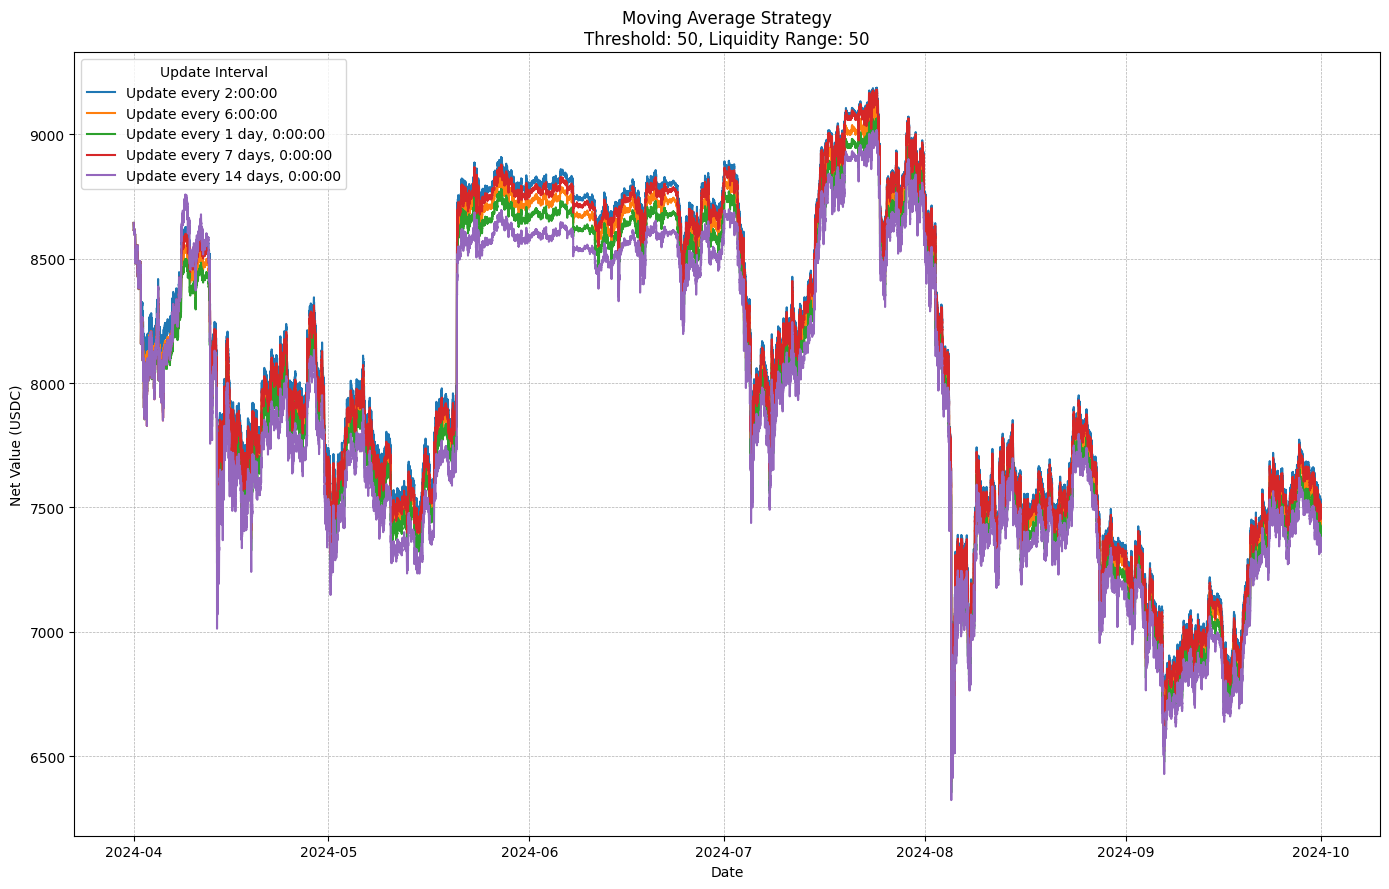

2024-11-28 14:57:39,082 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 14:57:45,884 - INFO - load file complete, preparing...
2024-11-28 14:57:54,853 - INFO - data has been prepared
2024-11-28 14:57:55,756 - INFO - Quote token is USDC
2024-11-28 14:57:55,756 - INFO - init strategy...
2024-11-28 14:57:55,952 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:09<00:00, 2039.65it/s]
2024-11-28 15:00:05,170 - INFO - main loop finished
2024-11-28 15:00:13,554 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1843.9060                ETH       :0.70640408               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  339.52306  0.10355052  5062153786146628

Quote by: USDC
Account balance history                           


2024-11-28 15:00:14,902 - INFO - Backtesting finished, execute time 139.160147190094s


l1                  net_value   tokens              market1                                                                                          price     
l2                                USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982 4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019 4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788 4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423 4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906 4321.749  

2024-11-28 15:00:18,018 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:00:24,854 - INFO - load file complete, preparing...
2024-11-28 15:00:33,284 - INFO - data has been prepared
2024-11-28 15:00:34,224 - INFO - Quote token is USDC
2024-11-28 15:00:34,227 - INFO - init strategy...
2024-11-28 15:00:34,452 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:22<00:00, 1850.10it/s]
2024-11-28 15:02:56,974 - INFO - main loop finished
2024-11-28 15:03:07,241 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1812.5908                ETH       :0.69510188               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  339.54242  0.10355642  5062442499450530

Quote by: USDC
Account balance history                           


2024-11-28 15:03:08,769 - INFO - Backtesting finished, execute time 154.56612539291382s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 15:03:09,682 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:03:15,470 - INFO - load file complete, preparing...
2024-11-28 15:03:23,361 - INFO - data has been prepared
2024-11-28 15:03:24,349 - INFO - Quote token is USDC
2024-11-28 15:03:24,350 - INFO - init strategy...
2024-11-28 15:03:24,552 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:04<00:00, 2111.71it/s]
2024-11-28 15:05:29,365 - INFO - main loop finished
2024-11-28 15:05:35,614 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1806.2380                ETH       :0.67908643               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  339.50398  0.10354470  5061869064705608

Quote by: USDC
Account balance history                           


2024-11-28 15:05:37,011 - INFO - Backtesting finished, execute time 132.69130754470825s


l1                  net_value   tokens              market1                                                                                          price     
l2                                USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982 4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019 4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788 4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423 4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906 4321.749  

2024-11-28 15:05:37,793 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:05:43,142 - INFO - load file complete, preparing...
2024-11-28 15:05:50,278 - INFO - data has been prepared
2024-11-28 15:05:51,513 - INFO - Quote token is USDC
2024-11-28 15:05:51,514 - INFO - init strategy...
2024-11-28 15:05:51,683 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:57<00:00, 2240.92it/s]
2024-11-28 15:07:49,289 - INFO - main loop finished
2024-11-28 15:07:58,329 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1812.7594                ETH       :0.68153828               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  346.12244  0.10556324  5160583142162234

Quote by: USDC
Account balance history                           


2024-11-28 15:07:59,672 - INFO - Backtesting finished, execute time 128.16713905334473s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 15:08:00,569 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:08:06,308 - INFO - load file complete, preparing...
2024-11-28 15:08:13,277 - INFO - data has been prepared
2024-11-28 15:08:13,814 - INFO - Quote token is USDC
2024-11-28 15:08:13,815 - INFO - init strategy...
2024-11-28 15:08:13,998 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:58<00:00, 2215.81it/s]
2024-11-28 15:10:12,940 - INFO - main loop finished
2024-11-28 15:10:20,329 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1744.2538                ETH       :0.65578243               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  346.12244  0.10556324  5160583142162234

Quote by: USDC
Account balance history                           


2024-11-28 15:10:21,988 - INFO - Backtesting finished, execute time 128.18226170539856s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

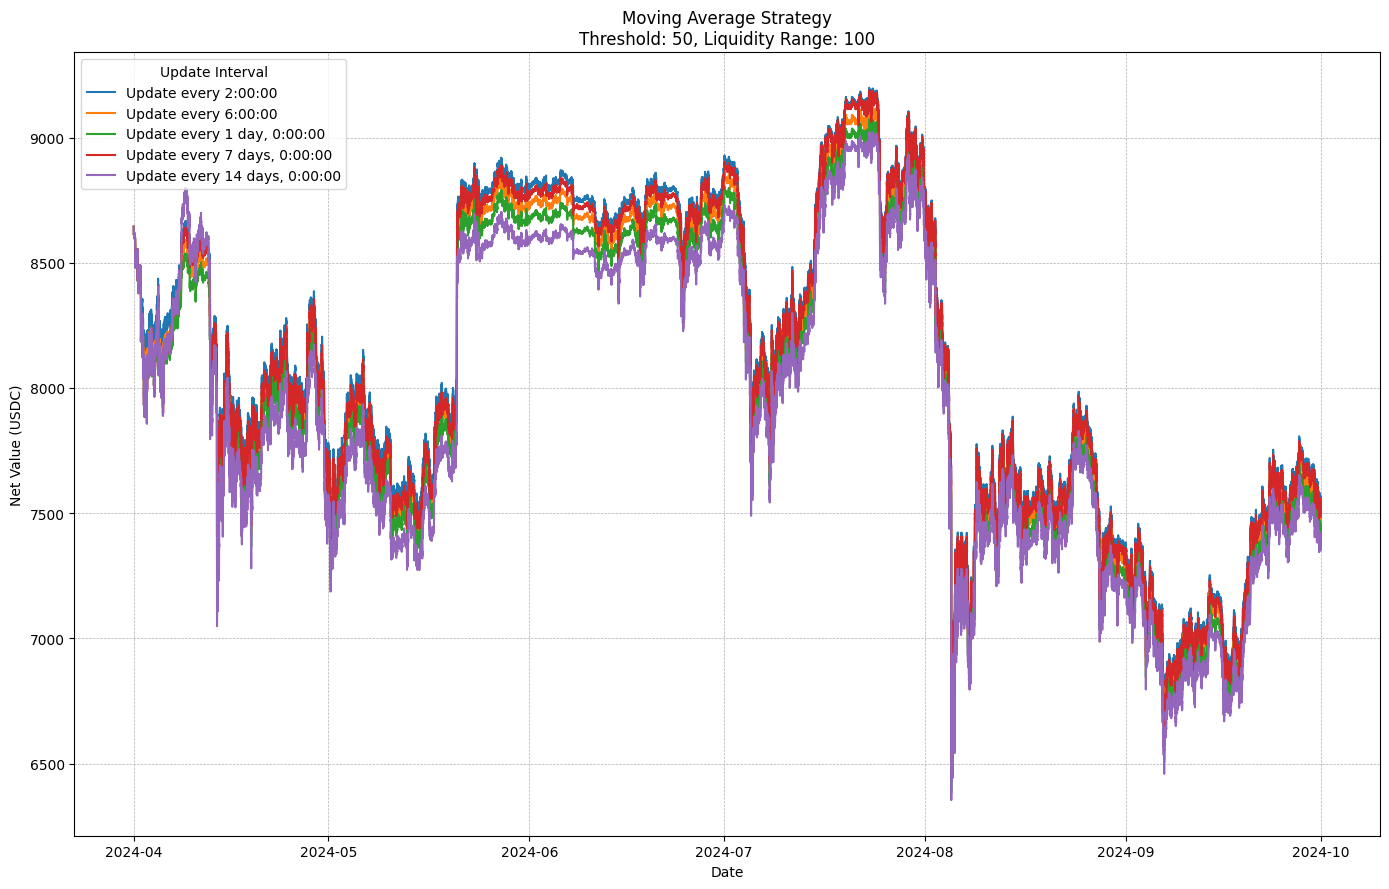

2024-11-28 15:10:23,723 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:10:29,320 - INFO - load file complete, preparing...
2024-11-28 15:10:36,435 - INFO - data has been prepared
2024-11-28 15:10:37,333 - INFO - Quote token is USDC
2024-11-28 15:10:37,334 - INFO - init strategy...
2024-11-28 15:10:37,527 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:57<00:00, 2233.77it/s]
2024-11-28 15:12:35,523 - INFO - main loop finished
2024-11-28 15:12:42,049 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1857.6092                ETH       :0.71165379               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  330.62178  0.10135855  2447982755515956

Quote by: USDC
Account balance history                           


2024-11-28 15:12:43,406 - INFO - Backtesting finished, execute time 126.0905430316925s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 15:12:45,445 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:12:50,843 - INFO - load file complete, preparing...
2024-11-28 15:12:57,823 - INFO - data has been prepared
2024-11-28 15:12:58,706 - INFO - Quote token is USDC
2024-11-28 15:12:58,707 - INFO - init strategy...
2024-11-28 15:12:58,873 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:56<00:00, 2268.87it/s]
2024-11-28 15:14:55,034 - INFO - main loop finished
2024-11-28 15:15:01,096 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1826.0613                ETH       :0.70026760               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  330.64063  0.10136433  2448122373002721

Quote by: USDC
Account balance history                           


2024-11-28 15:15:02,624 - INFO - Backtesting finished, execute time 123.92832851409912s


l1                  net_value    tokens             market1                                                                                          price     
l2                                 USDC       ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749 1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749 1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749 1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749 1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  4321.749 

2024-11-28 15:15:03,531 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:15:10,574 - INFO - load file complete, preparing...
2024-11-28 15:15:17,550 - INFO - data has been prepared
2024-11-28 15:15:18,289 - INFO - Quote token is USDC
2024-11-28 15:15:18,290 - INFO - init strategy...
2024-11-28 15:15:18,448 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:24<00:00, 1817.59it/s]
2024-11-28 15:17:43,443 - INFO - main loop finished
2024-11-28 15:17:53,102 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1819.6612                ETH       :0.68413313               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  330.60318  0.10135285  2447845068435083

Quote by: USDC
Account balance history                           


2024-11-28 15:17:54,561 - INFO - Backtesting finished, execute time 156.28078866004944s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-11-28 15:17:55,390 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:18:01,838 - INFO - load file complete, preparing...
2024-11-28 15:18:09,463 - INFO - data has been prepared
2024-11-28 15:18:10,328 - INFO - Quote token is USDC
2024-11-28 15:18:10,330 - INFO - init strategy...
2024-11-28 15:18:10,677 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:24<00:00, 1820.21it/s]
2024-11-28 15:20:35,551 - INFO - main loop finished
2024-11-28 15:20:45,125 - INFO - Print actuator summary
2024-11-28 15:20:46,423 - INFO - Backtesting finished, execute time 156.12927198410034s


Final account status                              
Token balance in broker       
USDC      :1826.7749                ETH       :0.68680764               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  337.04905  0.10332895  2495581737360828

Quote by: USDC
Account balance history                           
l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0 

2024-11-28 15:20:47,165 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-11-28 15:20:54,341 - INFO - load file complete, preparing...
2024-11-28 15:21:03,203 - INFO - data has been prepared
2024-11-28 15:21:04,141 - INFO - Quote token is USDC
2024-11-28 15:21:04,143 - INFO - init strategy...
2024-11-28 15:21:04,361 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [02:24<00:00, 1824.53it/s]
2024-11-28 15:23:28,834 - INFO - main loop finished
2024-11-28 15:23:41,061 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1757.7397                ETH       :0.66085265               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  337.04905  0.10332895  2495581737360828

Quote by: USDC
Account balance history                           


2024-11-28 15:23:42,984 - INFO - Backtesting finished, execute time 158.8560826778412s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

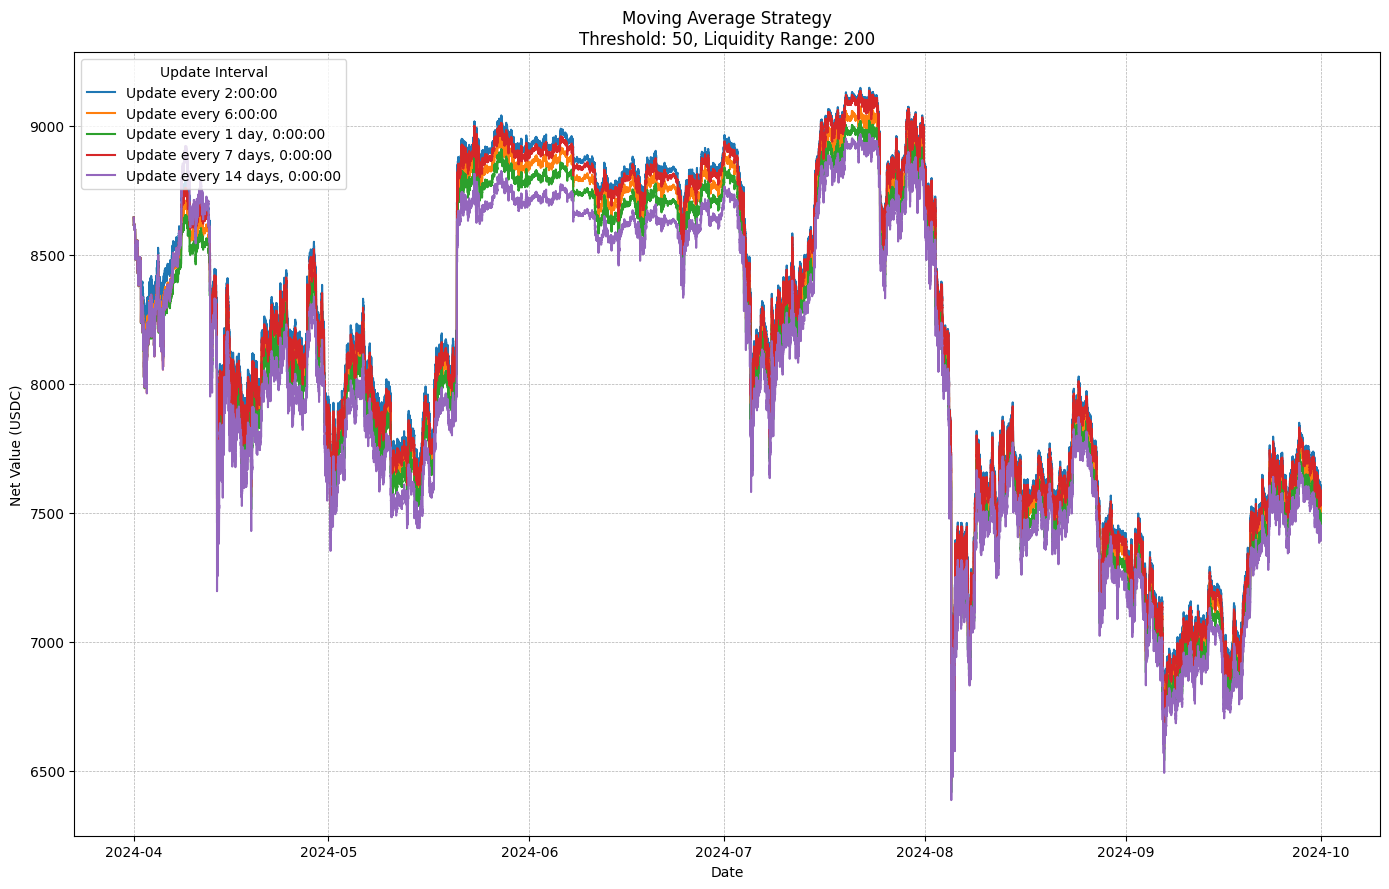

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
from decimal import Decimal
from demeter import TokenInfo, Actuator, Strategy, ChainType, MarketInfo, PeriodTrigger, RowData
from demeter.result import performance_metrics, round_results
from demeter.uniswap import UniV3Pool, UniLpMarket

# Token and Market setup
usdc = TokenInfo(name="usdc", decimal=6)
eth = TokenInfo(name="eth", decimal=18)
pool_address = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"
market_key = MarketInfo("market1")
start_date = date(2024, 4, 1)
end_date = date(2024, 9, 30)

# Load market data function
def load_market_data(market, data_path="../data"):
    market.data_path = data_path
    market.load_data(
        chain=ChainType.ethereum.name,
        contract_addr=pool_address,
        start_date=start_date,
        end_date=end_date,
    )
    return market

# Define Moving Average Strategy with dynamic thresholds and ranges
class MovingAverageStrategy(Strategy):
    def __init__(self, threshold=25, liquidity_range=100, update_interval=timedelta(days=1)):
        super().__init__()
        self.threshold = threshold
        self.liquidity_range = liquidity_range
        self.update_interval = update_interval

    def initialize(self):
        self.add_column(market_key, "sma", simple_moving_average(self.data[market_key].price, window=timedelta(days=1)))
        self.triggers.append(PeriodTrigger(time_delta=self.update_interval, trigger_immediately=True, do=self.rebalance))

    def rebalance(self, row_data: RowData):
        self.markets[market_key].even_rebalance(row_data.market_status[market_key].price)

    def on_bar(self, row_data: RowData):
        lp_market: UniLpMarket = self.markets[market_key]
        current_price = row_data.market_status[market_key].price
        ma_price = self.data[market_key].loc[row_data.timestamp]["sma"]
        ma_price = row_data.market_status[market_key].price if math.isnan(ma_price) else ma_price

        # Strategy based on moving average threshold and liquidity range
        if current_price > ma_price + self.threshold and len(lp_market.positions) < 1:
            lp_market.remove_all_liquidity()
            lp_market.add_liquidity(current_price, current_price + self.liquidity_range)
        elif current_price < ma_price - self.threshold and len(lp_market.positions) < 1:
            lp_market.remove_all_liquidity()
            lp_market.add_liquidity(current_price - self.liquidity_range, current_price)

# Function to run strategy and capture performance metrics
def run_strategy(threshold, liquidity_range, update_interval):
    market = load_market_data(UniLpMarket(market_key, UniV3Pool(usdc, eth, 0.05, usdc)))
    actuator = Actuator()
    actuator.broker.add_market(market)
    actuator.broker.set_balance(usdc, 5000)
    actuator.broker.set_balance(eth, 1)
    actuator.strategy = MovingAverageStrategy(threshold=threshold, liquidity_range=liquidity_range, update_interval=update_interval)
    actuator.set_price(market.get_price_from_data())
    actuator.run()

    # Capture and print performance metrics
    metrics = performance_metrics(
        actuator.account_status_df["net_value"], 
        benchmark=actuator.account_status_df["price"]["ETH"]
    )
    print(f"\nPerformance for Threshold = {threshold}, Liquidity Range = {liquidity_range}, Update Interval = {update_interval}:")
    print(round_results(metrics))
    
    # Return net value time series for plotting
    return actuator.account_status_df["net_value"]

# Parameter sets
thresholds = [10, 25, 50]
liquidity_ranges = [50, 100, 200]
update_intervals = [timedelta(hours=2), timedelta(hours=6), timedelta(days=1), timedelta(days=7), timedelta(days=14)]

# Loop through parameter combinations and plot results
for threshold in thresholds:
    for liquidity_range in liquidity_ranges:
        plt.figure(figsize=(14, 9))
        for update_interval in update_intervals:
            net_value_series = run_strategy(threshold, liquidity_range, update_interval)
            plt.plot(net_value_series.index, net_value_series, label=f"Update every {update_interval}")

        # Customize and display the plot for each threshold-liquidity range combination
        plt.title(f"Moving Average Strategy\nThreshold: {threshold}, Liquidity Range: {liquidity_range}")
        plt.xlabel("Date")
        plt.ylabel("Net Value (USDC)")
        plt.legend(title="Update Interval", loc="upper left", fontsize=10)
        plt.grid(visible=True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()
